In [36]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [3]:
heights = [172, 173, 174, 174, 174, 176, 177, 177, 177, 177, 178, 178, 179, 179, 179, 179, 179, 179, 180, 181, 181, 181, 181, 182, 182, 183, 184, 184, 185, 186]

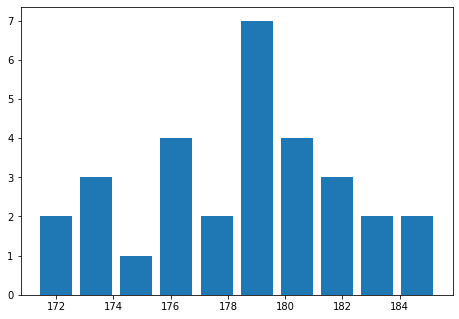

In [30]:
fig = plt.figure()
fig.add_axes([0,0,1,1])
plt.hist(heights, align='left', rwidth=0.8);

In [18]:
heights_short = [174, 176, 176, 177, 179, 180, 180, 180, 181, 182, 185]

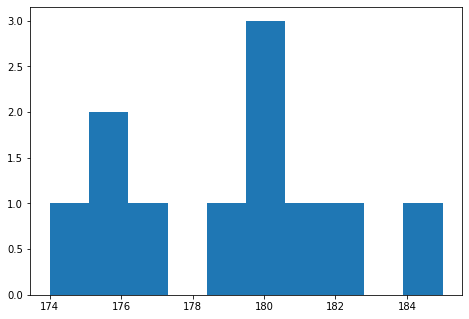

In [19]:
fig = plt.figure()
fig.add_axes([0,0,1,1])
plt.hist(heights_short);

In [35]:
data = [int(each) for each in '1 5 2 7 1 9 3 8 5 9'.split()]
np.std(data, ddof=1)

3.1622776601683795

In [44]:
1-scipy.stats.norm.cdf(125, 100, 15)

0.047790352272814696

In [38]:
(185.2-174) / 8

1.3999999999999986

In [46]:
scipy.stats.norm.cdf(70, 100, 15) - scipy.stats.norm.cdf(112, 100, 15)

-0.7653944694684242

In [50]:
data = [int(each) for each in "14 7 8 8 4 6 11 4 15 15 12 13 9 10 1 8 16 12 7 13 9 10 17 12 9".split()]
np.std(data), np.mean(data)

(3.919183588453085, 10.0)

In [51]:
scipy.stats.norm.cdf(115, 118, 9)

0.36944134018176367

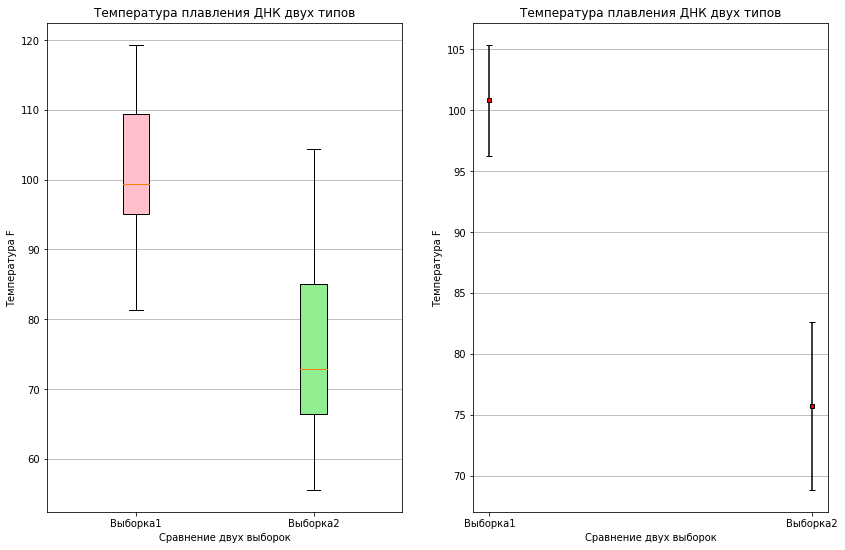

In [52]:
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt

array1 = [84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5]
array2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5]

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
df = pd.DataFrame({'Выборка1':array1, 'Выборка2':array2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = t.ppf((1 + p)/2, df['Mx']-1)
df['interval'] = K * df['SE']

#строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# график boxplot
bplot1 = ax1.boxplot([array1, array2],
                     vert=True,  # создаем вертикальные боксы
                     patch_artist=True, # для красоты заполним цветом боксы квантилей
                     labels=['Выборка1', 'Выборка2']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')
    
plt.show()

In [53]:
df

,Mx,SD,N,SE,interval
Выборка1,100.815,10.246503,20.0,2.291188,4.545754
Выборка2,75.735,15.458102,20.0,3.456537,6.886174
